<a href="https://colab.research.google.com/github/anishantony8/Image_Processing/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [21]:
data_dir = 'data/data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [43]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      ext = imghdr.what(image_path)
      if ext not in image_exts:
        os.remove(image_path)
    except Exception as e:
      print('Image not valid {}'.format(image_path))

In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [49]:
data = tf.keras.utils.image_dataset_from_directory('data/data')

Found 305 files belonging to 2 classes.


In [46]:
data_iterator = data.as_numpy_iterator()

In [51]:
batch = data_iterator.next()

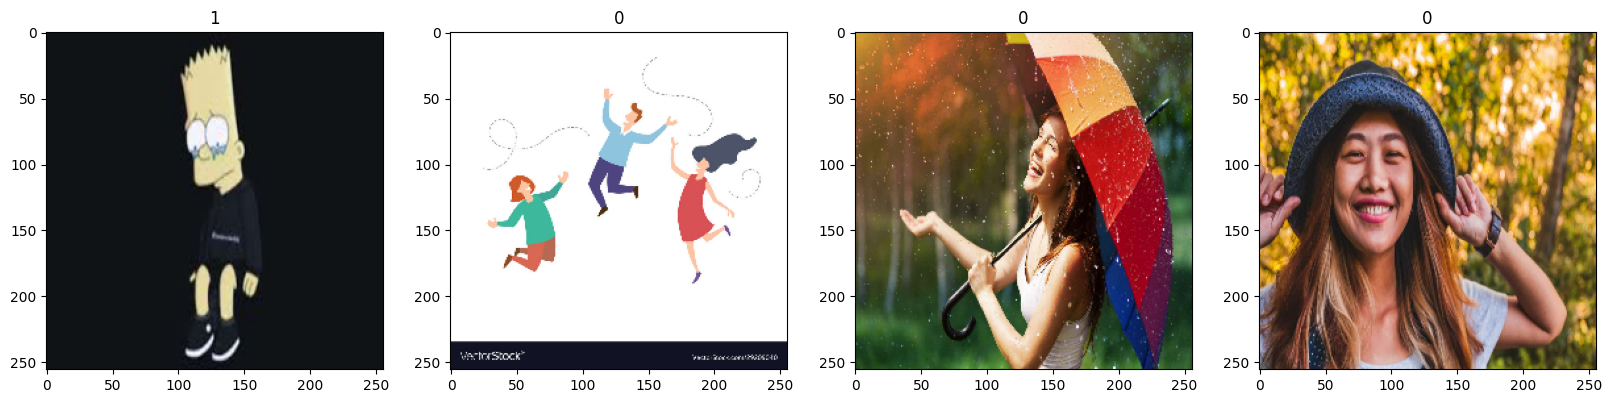

In [52]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [55]:
data = data.map(lambda x,y: (x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [56]:
data.as_numpy_iterator().next()

(array([[[[0.9764706 , 0.9764706 , 0.94509804],
          [0.9764706 , 0.9764706 , 0.94509804],
          [0.9764706 , 0.9764706 , 0.94509804],
          ...,
          [0.5568628 , 0.5116728 , 0.47444853],
          [0.5677696 , 0.5285539 , 0.48933825],
          [0.58311886, 0.5439032 , 0.5046875 ]],
 
         [[0.9764706 , 0.9764706 , 0.94509804],
          [0.9764706 , 0.9764706 , 0.94509804],
          [0.9764706 , 0.9764706 , 0.94509804],
          ...,
          [0.5604779 , 0.515288  , 0.47806373],
          [0.5713848 , 0.5321691 , 0.49295342],
          [0.58673406, 0.5475184 , 0.5083027 ]],
 
         [[0.9764706 , 0.9764706 , 0.94509804],
          [0.9764706 , 0.9764706 , 0.94509804],
          [0.9764706 , 0.9764706 , 0.94509804],
          ...,
          [0.5660968 , 0.5209068 , 0.48368254],
          [0.576929  , 0.5377133 , 0.49849758],
          [0.5921569 , 0.5529412 , 0.5137255 ]],
 
         ...,
 
         [[0.22352941, 0.14509805, 0.10980392],
          [0.22352

In [57]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [62]:
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [63]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 16)      

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [66]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 24s 3s/step - loss: 1.1623 - accuracy: 0.4688 - val_loss: 0.7088 - val_accuracy: 0.4688
Epoch 2/20
7/7 [==============================] - 30s 4s/step - loss: 0.6818 - accuracy: 0.6027 - val_loss: 0.6515 - val_accuracy: 0.6875
Epoch 3/20
7/7 [==============================] - 23s 3s/step - loss: 0.6658 - accuracy: 0.5357 - val_loss: 0.6430 - val_accuracy: 0.5469
Epoch 4/20
7/7 [==============================] - 23s 3s/step - loss: 0.6241 - accuracy: 0.7054 - val_loss: 0.5514 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 22s 3s/step - loss: 0.5440 - accuracy: 0.7411 - val_loss: 0.4826 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 22s 3s/step - loss: 0.4782 - accuracy: 0.8259 - val_loss: 0.3909 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 22s 3s/step - loss: 0.4169 - accuracy: 0.8036 - val_loss: 0.3271 - val_accuracy: 0.9062
Epoch 8/20
7/7 [==================

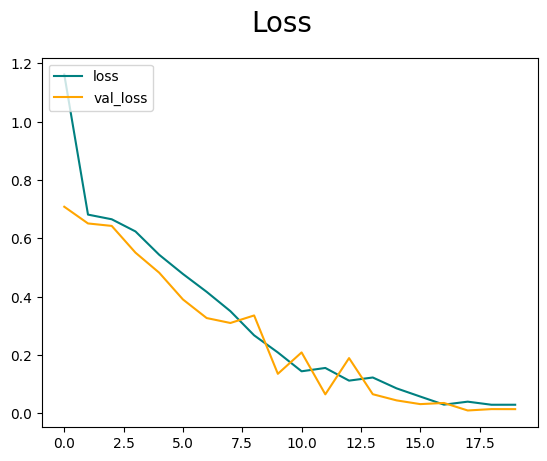

In [74]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

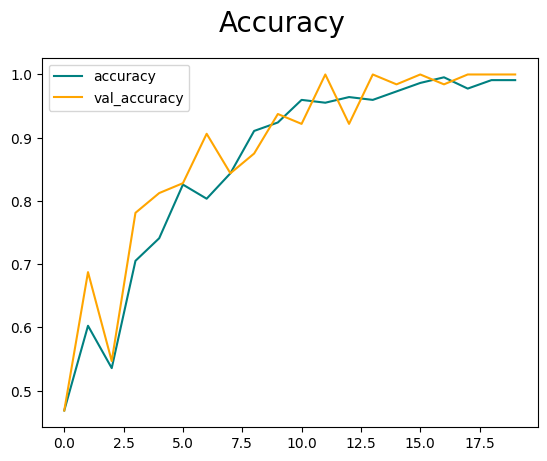

In [75]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [76]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [78]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [79]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 535ms/step


In [80]:
pre.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.85714287>

In [81]:
re.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [82]:
acc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9411765>

In [83]:
import cv2

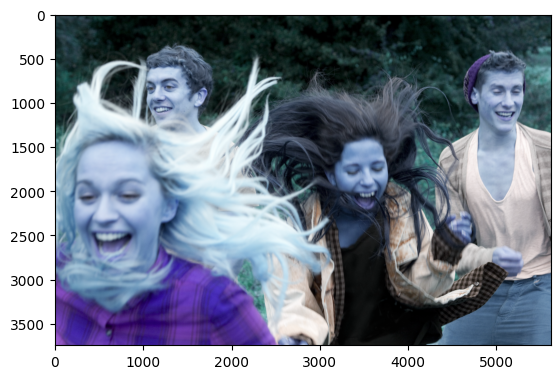

In [85]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

(-0.5, 255.5, 255.5, -0.5)

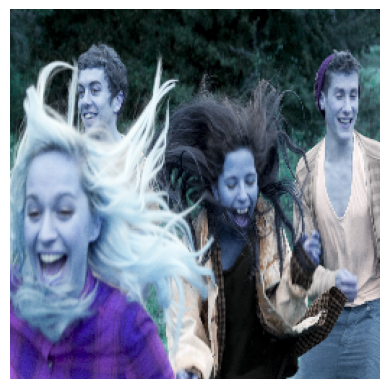

In [87]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.axis('off')

In [88]:
y_pred = model.predict(np.expand_dims(resize/255,0))
y_pred

1/1 [==============================] - 0s 41ms/step


array([[0.11664185]], dtype=float32)

In [89]:
if y_pred > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [90]:
from tensorflow.keras.models import load_model

In [91]:
model.save(os.path.join('models','Image_Classifier.h5'))

In [93]:
new_model = load_model('models/Image_Classifier.h5')

In [94]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 159ms/step


array([[0.11664185]], dtype=float32)